<h1> Accessing and plotting ERCOT data </h1>
<h4>Download Site-Level Day-Ahead Fcsts:</h4>  

` aws s3 ls s3://arpa-e-perform/ERCOT/2018/Wind/Forecasts/Day-ahead/Site_level/{Site}_wind_day-ahead_fcst_2018.h5 `

<h4>Download Site-Level Actual:</h4>  

` aws s3 ls s3://arpa-e-perform/ERCOT/2018/Wind/Actuals/Site_level/{Site}_wind_actuals_2018.h5 `


In [ ]:
import h5py
import pandas as pd
import s3fs 
import matplotlib.pyplot as plt
import datetime
from io import BytesIO
from functools import partial


#df = pd.read_hdf('BA_wind_actuals_2018.h5')
with h5py.File('BA_wind_actuals_2018.h5', 'r') as f:
    df= pd.DataFrame(f['actuals'][...])
    # temp =pd.to_datetime(f['time_index'][...].astype(str))
    df2 = pd.to_datetime(f['time_index'][...].astype(str), errors='coerce', format='%Y-%m-%d %H:%M:%S') 
    df3 = pd.DataFrame(df[6]); #selects the site location from 2D actuals dataset (CURRENTLY: Bethel Facility:   34.5181    -102.416    360	   120	 Existing	North )
    plt.plot(df2,df3)
    plt.xlim(datetime.datetime(2018,9,1,0), datetime.datetime(2018,9,6,23)) # Format:(year, month, day, hour, min, sec)
    plt.xticks(rotation='vertical')
    plt.margins(0.2)
    plt.xlabel("Date/Hour")
    plt.ylabel("Power [MW]")
    plt.title("7-Day Wind Power Generation (Bethel Wind Farm)")
    plt.show()
    plt.savefig("7-Day-Bethel.png")
    f.close()


In [ ]:
with h5py.File('BA_wind_intra-hour_fcst_2018.h5', 'r') as f:
    forecasts= pd.DataFrame(f['forecasts'][...])
    time_intervals = pd.DataFrame(f['forecast_time'][...]) 
    time_intervals[0] = time_intervals[0].str.decode("utf-8") #Convert from byte array to string
    time_steps = pd.to_datetime(f['forecast_time'][...].astype(str), format='%Y-%m-%d %H:%M:%S%z:00', errors='raise', utc = True)
    
    percentile = pd.DataFrame(forecasts[49]); #50th PERCENTILE
        
    plt.plot(time_steps, percentile)
    plt.xlim(datetime.datetime(2018,9,1,0), datetime.datetime(2018,9,6,23)) # Format:(year, month, day, hour, min, sec)
    plt.xticks(rotation='vertical')
    plt.margins(0.2)
    plt.xlabel("Date/Hour")
    plt.ylabel("Power [MW]")
    plt.title("1-Day Forecasted Wind Power Generation (50th Percentile)")
    # plt.savefig("1-Week-Forecasted.png")
    plt.show()
    f.close()


<h2>Read and graph Bethel site actual power generation</h2>

In [ ]:
with h5py.File('Site_Bethel_wind_actuals_2018.h5', 'r') as f:

    actuals = pd.DataFrame(f['actuals'][...])
    time_steps = pd.to_datetime(f['time_index'][...].astype(str), errors='coerce', format='%Y-%m-%d %H:%M:%S')
    plt.plot(time_steps,actuals[0])
    plt.xlim(datetime.datetime(2018,9,1), datetime.datetime(2018,9,8)) # Format:(year, month, day, hour, min, sec)
    plt.ylim(0,250)
    plt.xticks(rotation='vertical')
    plt.margins(0.2)
    plt.xlabel("Date/Hour")
    plt.ylabel("Power [MW]")
    plt.title("1-Week Actual Wind Power Generation (Bethel Wind Farm)")
    plt.savefig("1-Week-Actuals.png")
    plt.show()
    f.close()

<h2> Read and graph Bethel site wind day-ahead forecast </h2>

In [ ]:
with h5py.File('Site_Bethel_wind_day-ahead_fcst_2018.h5', 'r') as f:
    forecasts= pd.DataFrame(f['forecasts'][...])
    time_intervals = pd.DataFrame(f['forecast_time'][...]) 
    print(forecasts.shape)
    print(time_intervals.shape)
    time_intervals[0] = time_intervals[0].str.decode("utf-8") #Convert from byte array to string
    time_steps = pd.to_datetime(f['forecast_time'][...].astype(str), format='%Y-%m-%d %H:%M:%S%z', errors='raise', utc = True)
    
    percentile = pd.DataFrame(forecasts[49]); #50th PERCENTILE
        
    plt.plot(time_steps, percentile, "r-")
    plt.xlim(datetime.datetime(2018,9,1), datetime.datetime(2018,9,8)) # Format:(year, month, day, hour, min, sec)
    plt.ylim(0,250)
    plt.xticks(rotation='vertical')
    plt.margins(0.2)
    plt.xlabel("Date/Hour")
    plt.ylabel("Power [MW]")
    plt.title("1 Week Day-Ahead Forecasted Wind Power Generation (50th Percentile, Bethel Wind Farm)")
    plt.savefig("1-Week-Forecasted.png")
    plt.show()
    f.close()

<h2> Read and graph Bethel site Actual vs. Day-Ahead wind power generation </h2>

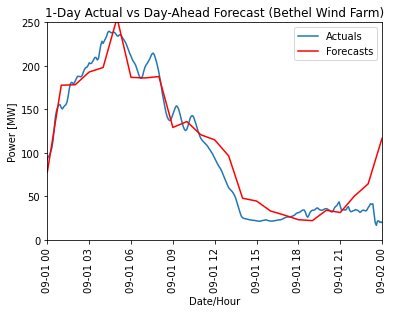

In [10]:
with h5py.File('Site_Bethel_wind_day-ahead_fcst_2018.h5', 'r') as f:

    forecasts= pd.DataFrame(f['forecasts'][...])
    time_intervals = pd.DataFrame(f['forecast_time'][...]) 
    time_intervals[0] = time_intervals[0].str.decode("utf-8") #Convert from byte array to string
    fcst_time_steps = pd.to_datetime(f['forecast_time'][...].astype(str), format='%Y-%m-%d %H:%M:%S%z', errors='raise', utc = True)
    percentile = pd.DataFrame(forecasts[49]); #50th PERCENTILE

with h5py.File('Site_Bethel_wind_actuals_2018.h5', 'r') as f:
    actuals = pd.DataFrame(f['actuals'][...])
    actual_time_steps = pd.to_datetime(f['time_index'][...].astype(str), errors='coerce', format='%Y-%m-%d %H:%M:%S')

plt.plot(actual_time_steps, actuals[0], label = "Actuals")
plt.plot(fcst_time_steps, percentile, "r-", label= "Forecasts")
plt.xlim(datetime.datetime(2018,9,1), datetime.datetime(2018,9,2)) # Format:(year, month, day, hour, min, sec)
plt.ylim(0,250)
plt.xticks(rotation='vertical')
plt.margins(0.2)
plt.xlabel("Date/Hour")
plt.ylabel("Power [MW]")
plt.title("1-Day Actual vs Day-Ahead Forecast (Bethel Wind Farm)")
plt.legend()
# plt.savefig("Bethel-1-day-actual-v-day-ahead-fcst.png")
plt.show()